# (How do users use a bike sharing platform?)
## by Ellen

## Investigation Overview

- In this presentation we will making assessments over how users interact with a bike sharing platform. Some questions include;
    - What is the average duration of a bike ride?
    - Do makes or females use this platform more?
    - When is it the busiest to cycle?
    - Who cycles more?

## Dataset Overview

The dataset that we will be using today is Ford GoBike's trip data for about 180k different trips used by both subscribers and customers (pay as you go) from February 2019. Certain features included gender, start time. However due to missing data and null values, we had to do some cleaning before getting started. Some features were also extracted such as day of the week from datetime data.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [52]:
# load in the dataset into a pandas dataframe
bikes_clean = pd.read_csv('bikes_clean_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The average duration of a bike ride is about 10 minutes

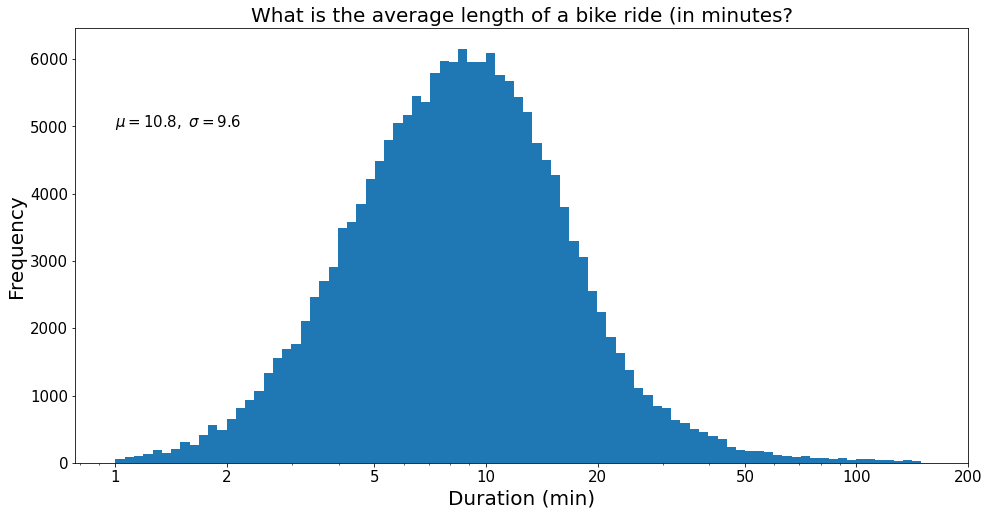

In [53]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(bikes_clean['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize = [16, 8]);
plt.hist(data = bikes_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.title('What is the average length of a bike ride (in minutes?', size=20)
plt.text(1, 5000, r'$\mu=10.8,\ \sigma=9.6$', size = 15)
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200], size=15);
plt.yticks(size=15)
plt.xlabel('Duration (min)', size=20);
plt.ylabel('Frequency', size=20);

## (Visualization 2)

> The most popular day of the week to cycle is on Thursday. However weekdays are more popular than weekends.

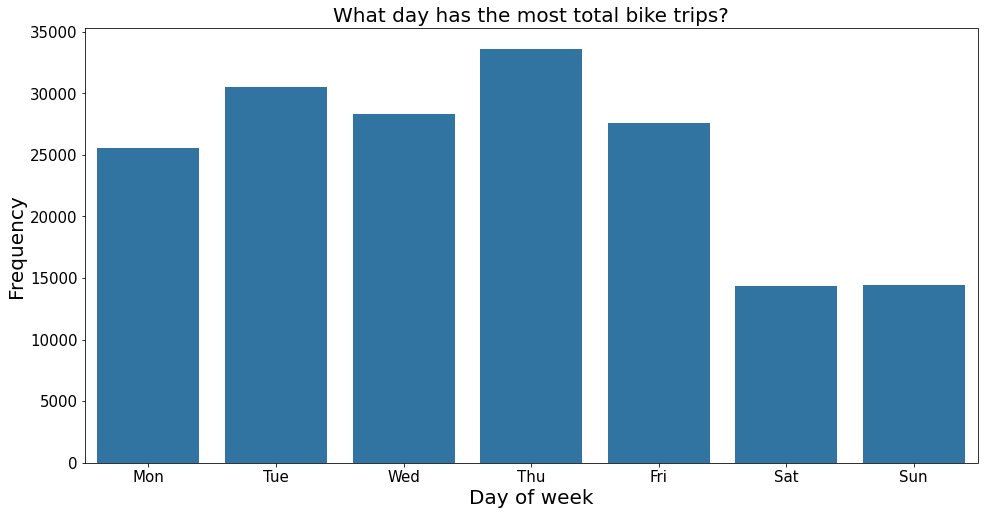

In [54]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
bikes_clean['start_dayofweek'] = bikes_clean['start_dayofweek'].astype(ordered_weekdays)

base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 8]);
sns.countplot(data=bikes_clean, x='start_dayofweek', color=base_color, order=weekdays);
plt.title('What day has the most total bike trips?', size=20)
plt.xlabel('Day of week', size=20);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('Frequency', size=20);

## (Visualization 3)

The busiest part of the day is 8 am and 5 pm which co-incides with commutes from work. The previous visualisation showed that weekends are quieter to cycle on. However, by adding another variable we can see that between the hours of 10 am and 5 pm more cycle trips are made at the weekend when compared to the weekedays.

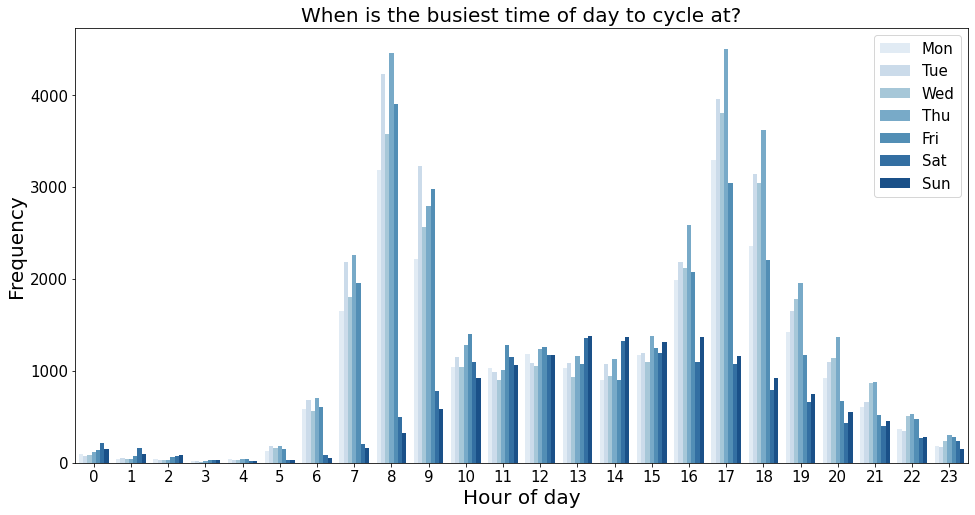

In [55]:
plt.figure(figsize = [16, 8]);
sns.countplot(data = bikes_clean, x = 'start_time_hour', hue = 'start_dayofweek', palette = 'Blues');
plt.title('When is the busiest time of day to cycle at?', size =20)
plt.xlabel('Hour of day', size=20);
plt.ylabel('Frequency', size=20);
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(prop={'size': 15});

## (Visualization 4)

Generally trip frequences decrease with the weekend, however, trip duration increases with the weekend as revealed with this multivariate visualisation.

Trip duration for customers remains stable for the weekdays, while trip duration for subscribers is variable during the weekdays. However both rise during the weekend. Overall trip lengths of customers are shorter. are shorter.

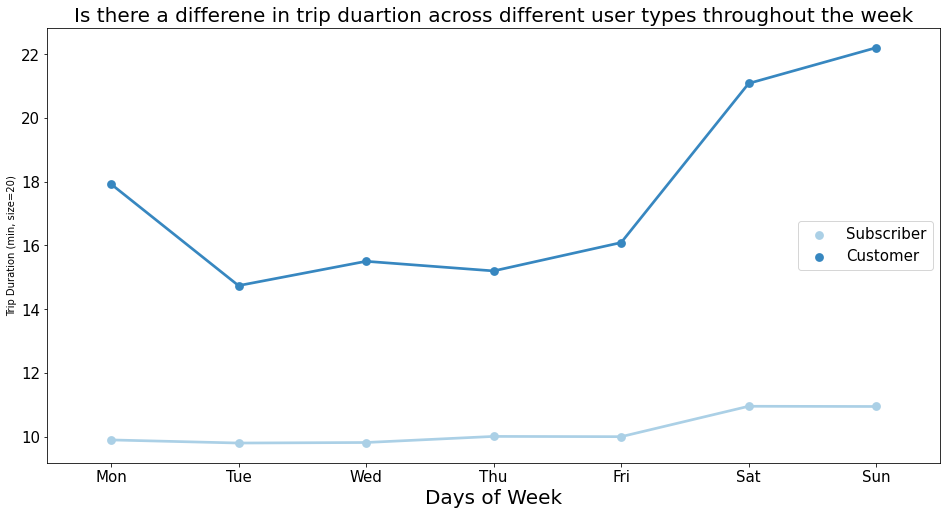

In [56]:
fig = plt.figure(figsize = [16,8])
sns.pointplot(data = bikes_clean, x = 'start_dayofweek', y = 'duration_min', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Is there a differene in trip duartion across different user types throughout the week', size=20)
plt.ylabel('Trip Duration (min, size=20)')
plt.xlabel('Days of Week', size=20)
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(loc=5, prop={'size': 15});

## (Visualization 5)

Generally for the different genders, the trip duration also increases during the week, especially on the weekend. However, males tend to have longer trips.

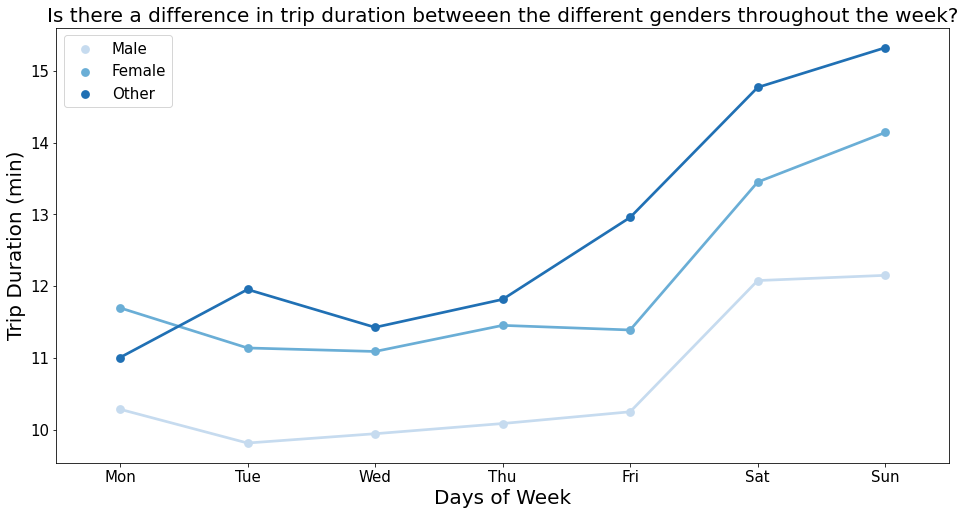

In [57]:
fig = plt.figure(figsize = [16,8])
sns.pointplot(data = bikes_clean, x = 'start_dayofweek', y = 'duration_min', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Is there a difference in trip duration betweeen the different genders throughout the week?', size=20)
plt.ylabel('Trip Duration (min)', size=20)
plt.xlabel('Days of Week', size=20)
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(loc=0, prop={'size': 15});

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert Project_Bikes_Part2.ipynb --to slides --post serve --no-input --no-prompt